In [1]:
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp

In [2]:
from GraphST import GraphST

In [3]:
dataset = 'Mouse_Embryo'

In [4]:
# Run device，by default, the package is implemented on 'cpu'. We recommend using GPU.
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

# the location of R, which is necessary for mclust algorithm. Please replace it with local R installation path
os.environ['R_HOME'] = 'C:/Users/AGNISH/.conda/envs/GraphST/Lib/R/'

In [5]:
# the number of clusters
n_clusters = 22

In [6]:
# read data
file_path = 'C:/Users/AGNISH/Desktop/IITK/VSCode/GraphST/Mouse_Embryo_E9.5/' #please replace 'file_path' with the download path
adata = sc.read_h5ad(file_path + 'E9.5_E1S1.MOSTA.h5ad')
adata.var_names_make_unique()

In [7]:
# define model
model = GraphST.GraphST(adata, datatype='Stereo', device=device)

# run model
adata = model.train()

c:\Users\AGNISH\.conda\envs\GraphST\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Graph constructed!
Building sparse matrix ...
Begin to train ST data...


100%|██████████| 600/600 [08:03<00:00,  1.24it/s]


Optimization finished for ST data!


In [8]:
# clustering
from GraphST.utils import clustering

tool = 'mclust' # mclust, leiden, and louvain

# clustering
from GraphST.utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, method=tool)
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, method=tool, start=0.1, end=2.0, increment=0.01)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 5.4.10
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


c:\Users\AGNISH\.conda\envs\GraphST\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Text(0.5, 1.0, 'Mouse Embryo E9.5')

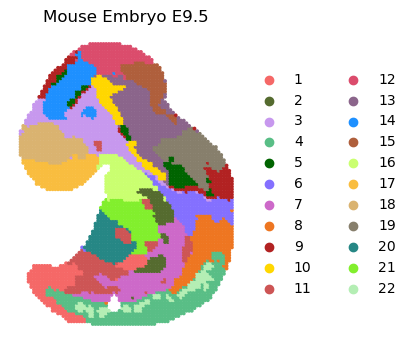

In [9]:
import matplotlib.pyplot as plt
adata.obsm['spatial'][:, 1] = -1*adata.obsm['spatial'][:, 1]
plt.rcParams["figure.figsize"] = (3, 4)
plot_color=["#F56867","#556B2F","#C798EE","#59BE86","#006400","#8470FF",
            "#CD69C9","#EE7621","#B22222","#FFD700","#CD5555","#DB4C6C",
            "#8B658B","#1E90FF","#AF5F3C","#CAFF70", "#F9BD3F","#DAB370",
           "#877F6C","#268785", '#82EF2D', '#B4EEB4']

ax = sc.pl.embedding(adata, basis="spatial",
                     color="domain",
                     s=30,
                     show=False,
palette=plot_color,
                     title='GraphST')
ax.axis('off')
ax.set_title('Mouse Embryo E9.5')